In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/opt/ml/input/code/data/users.csv')
df.head()

,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0


In [2]:
isna= df['age'].isna().sum() / len(df['age'])
print(f'age isna: {isna*100:.2f}%')

sum=0
for i in range(9):
    r = (df['age'].where((df['age']>i*10) & (df['age']<=(i+1)*10)) == df['age']).sum() / len(df['age'])
    print(f'{i*10}~{(i+1)*10}: {r*100:.2f}%')
    sum += r

print(f'total: {isna*100 + sum*100}%')

age isna: 40.88%
0~10: 0.15%
10~20: 6.89%
20~30: 16.75%
30~40: 15.35%
40~50: 9.79%
50~60: 6.86%
60~70: 2.65%
70~80: 0.61%
80~90: 0.06%
total: 99.9853139869588%


(array([7.400e+01, 7.320e+02, 3.244e+03, 3.645e+03, 6.034e+03, 6.009e+03,
        4.369e+03, 4.001e+03, 3.419e+03, 2.378e+03, 2.560e+03, 1.823e+03,
        1.027e+03, 4.770e+02, 3.040e+02, 1.110e+02, 3.300e+01, 7.000e+00,
        6.000e+00, 6.000e+00]),
 array([ 5. ,  9.7, 14.4, 19.1, 23.8, 28.5, 33.2, 37.9, 42.6, 47.3, 52. ,
        56.7, 61.4, 66.1, 70.8, 75.5, 80.2, 84.9, 89.6, 94.3, 99. ]),
 <BarContainer object of 20 artists>)

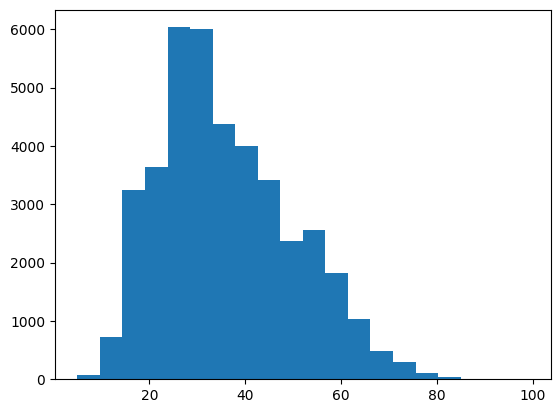

In [3]:
plt.hist(df['age'].to_numpy(), bins=20)

In [76]:
df = pd.read_csv('/opt/ml/input/code/data/books.csv')
df.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg


In [77]:
isna = df['summary'].isna().sum() / len(df['summary'])
print(f'isna: {isna*100:.2f}%')
print(len(df))

isna: 44.95%
149570


In [78]:
print(df['summary'].isna().sum())

67227


In [79]:
# df = pd.read_csv('/opt/ml/input/code/data/books.csv')
# df = df.drop([i for i, x in enumerate(df['summary'].isna()) if x])
# # summ = df['summary'].astype('s|')

# import re
# from nltk.tokenize import word_tokenize, sent_tokenize

# def preprocess(sen: str) -> str:
#     sentence = re.sub(r'[^\uAC00-\uD7A30-9a-zA-Z\s]', '', sen)
#     sentence = sentence.replace("\n", "")
#     return sentence.strip()

# summ = pd.DataFrame(df['summary'])
# summ['summ_preprocess'] = summ['summary'].apply(lambda sen: preprocess(sen))
# summ = summ.reset_index(drop=True)
# summ.head(20)

In [82]:
df = pd.read_csv('/opt/ml/input/code/data/books.csv')
df = df.drop([i for i, x in enumerate(df['summary'].isna()) if x])
# summ = df['summary'].astype('s|')

import re
from nltk.tokenize import word_tokenize, sent_tokenize

w2v_train_sen = []

def preprocess(sen: str) -> str:
    w2v_train_sen.extend(sent_tokenize(sen))

def preprocess2(sen: str) -> str:
    sentence = sen.replace('\n', ' ')
    return sentence.strip()

summ = pd.DataFrame(df['summary'])
summ = summ.reset_index(drop=True)
summ['summary'].apply(lambda sen: preprocess(sen))

w2v_train_sen_df = pd.DataFrame(w2v_train_sen, columns=['sen'])
w2v_train_sen_df['preprocess'] = w2v_train_sen_df['sen'].apply(lambda sen: preprocess2(sen))
w2v_train_sen_df.head(10)

,sen,preprocess
0,"In a small town in Canada, Clara Callan reluct...","In a small town in Canada, Clara Callan reluct..."
1,"Here, for the first time in paperback, is an o...","Here, for the first time in paperback, is an o..."
2,Nationa\nadvertising in Military History.,Nationa advertising in Military History.
3,"Describes the great flu epidemic of 1918, an o...","Describes the great flu epidemic of 1918, an o..."
4,A Chinese immigrant who is convinced she is dy...,A Chinese immigrant who is convinced she is dy...
5,"Essays by respected military historians, inclu...","Essays by respected military historians, inclu..."
6,"Now back in print, Ann Beattie&#39;s finest sh...","Now back in print, Ann Beattie&#39;s finest sh..."
7,Another story based in the fictional rural tow...,Another story based in the fictional rural tow...
8,"This eye-opening, well-researched examination ...","This eye-opening, well-researched examination ..."
9,Illustrations.,Illustrations.


In [83]:
w2v_train_sen_df['token'] = w2v_train_sen_df['preprocess'].apply(lambda sen: word_tokenize(sen))
w2v_train_sen_df.head(10)

,sen,preprocess,token
0,"In a small town in Canada, Clara Callan reluct...","In a small town in Canada, Clara Callan reluct...","[In, a, small, town, in, Canada, ,, Clara, Cal..."
1,"Here, for the first time in paperback, is an o...","Here, for the first time in paperback, is an o...","[Here, ,, for, the, first, time, in, paperback..."
2,Nationa\nadvertising in Military History.,Nationa advertising in Military History.,"[Nationa, advertising, in, Military, History, .]"
3,"Describes the great flu epidemic of 1918, an o...","Describes the great flu epidemic of 1918, an o...","[Describes, the, great, flu, epidemic, of, 191..."
4,A Chinese immigrant who is convinced she is dy...,A Chinese immigrant who is convinced she is dy...,"[A, Chinese, immigrant, who, is, convinced, sh..."
5,"Essays by respected military historians, inclu...","Essays by respected military historians, inclu...","[Essays, by, respected, military, historians, ..."
6,"Now back in print, Ann Beattie&#39;s finest sh...","Now back in print, Ann Beattie&#39;s finest sh...","[Now, back, in, print, ,, Ann, Beattie, &, #, ..."
7,Another story based in the fictional rural tow...,Another story based in the fictional rural tow...,"[Another, story, based, in, the, fictional, ru..."
8,"This eye-opening, well-researched examination ...","This eye-opening, well-researched examination ...","[This, eye-opening, ,, well-researched, examin..."
9,Illustrations.,Illustrations.,"[Illustrations, .]"


In [84]:
print(w2v_train_sen_df['token'][6])

['Now', 'back', 'in', 'print', ',', 'Ann', 'Beattie', '&', '#', '39', ';', 's', 'finest', 'short', 'story', 'collection', ',', 'reissued', 'to', 'accompany', 'the', 'publication', 'of', 'her', 'latest', 'novel', ',', '&', 'quot', ';', 'The', 'Doctor', '&', '#', '39', ';', 's', 'House', '.']


In [74]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=w2v_train_sen_df['token'], vector_size=256, window=7, min_count=5, workers=4, sg=1) # 1 - skip gram, 0 - cbow

In [75]:
model_result = model.wv.most_similar('king')
print(model_result) # skip gram

[('throne', 0.8317713141441345), ('prince', 0.7982721328735352), ('knight', 0.7959052920341492), ('sorcerer', 0.790558934211731), ('sorceress', 0.7901029586791992), ('Mordred', 0.7892853617668152), ('crown', 0.7748513221740723), ('kingdom', 0.7616322040557861), ('queen', 0.7543469071388245), ('ruler', 0.7516805529594421)]


In [72]:
model_result = model.wv.most_similar('king')
print(model_result) # cbow

[('queen', 0.8770656585693359), ('wizard', 0.8570755124092102), ('clan', 0.8356361985206604), ('throne', 0.8234137892723083), ('prince', 0.8083016276359558), ('murderer', 0.8027702569961548), ('princess', 0.7958220839500427), ('warrior', 0.787334680557251), ('mistress', 0.7868860363960266), ('enemy', 0.7849822044372559)]


In [15]:
from tokenizers import BertWordPieceTokenizer
import easydict

args = easydict.EasyDict({
    "corpus_file":"",
    "vocab_size":22000,
    "limit_alphabet":6000
})

tokenizer = BertWordPieceTokenizer(
    vocab=None,
    clean_text=True,
    handle_chinese_chars=True,
    strip_accents=False, # Must be False if cased model
    lowercase=False,
    wordpieces_prefix="##"
)

tokenizer.train(
    files=[args.corpus_file],
    limit_alphabet=args.limit_alphabet,
    vocab_size=args.vocab_size
)

TypeError: argument 'files': 'type' object cannot be converted to 'PyString'